Training Default Linear Regression Model...

--- Default Model Performance ---
R-squared (R²): 0.091
Mean Squared Error (MSE): 0.944
Root Mean Squared Error (RMSE): 0.972

Training Custom-Tuned Linear Regression Model (Ridge)...
Optimal alpha for Ridge Regression: 0.1

--- Custom-Tuned Model Performance ---
R-squared (R²): 0.091
Mean Squared Error (MSE): 0.944
Root Mean Squared Error (RMSE): 0.972

             Summary Report
Model Comparison for Earthquake Magnitude Prediction
--------------------------------------------------
Model                         R² Score       MSE            RMSE           
--------------------------------------------------
Default Linear Regression     0.091          0.944          0.972          
Custom (Ridge) Regression     0.091          0.944          0.972          

Coefficients of the Default Linear Regression Model:
                        Coefficient
Latitude                   0.035424
Longitude                  0.050796
Depth                    

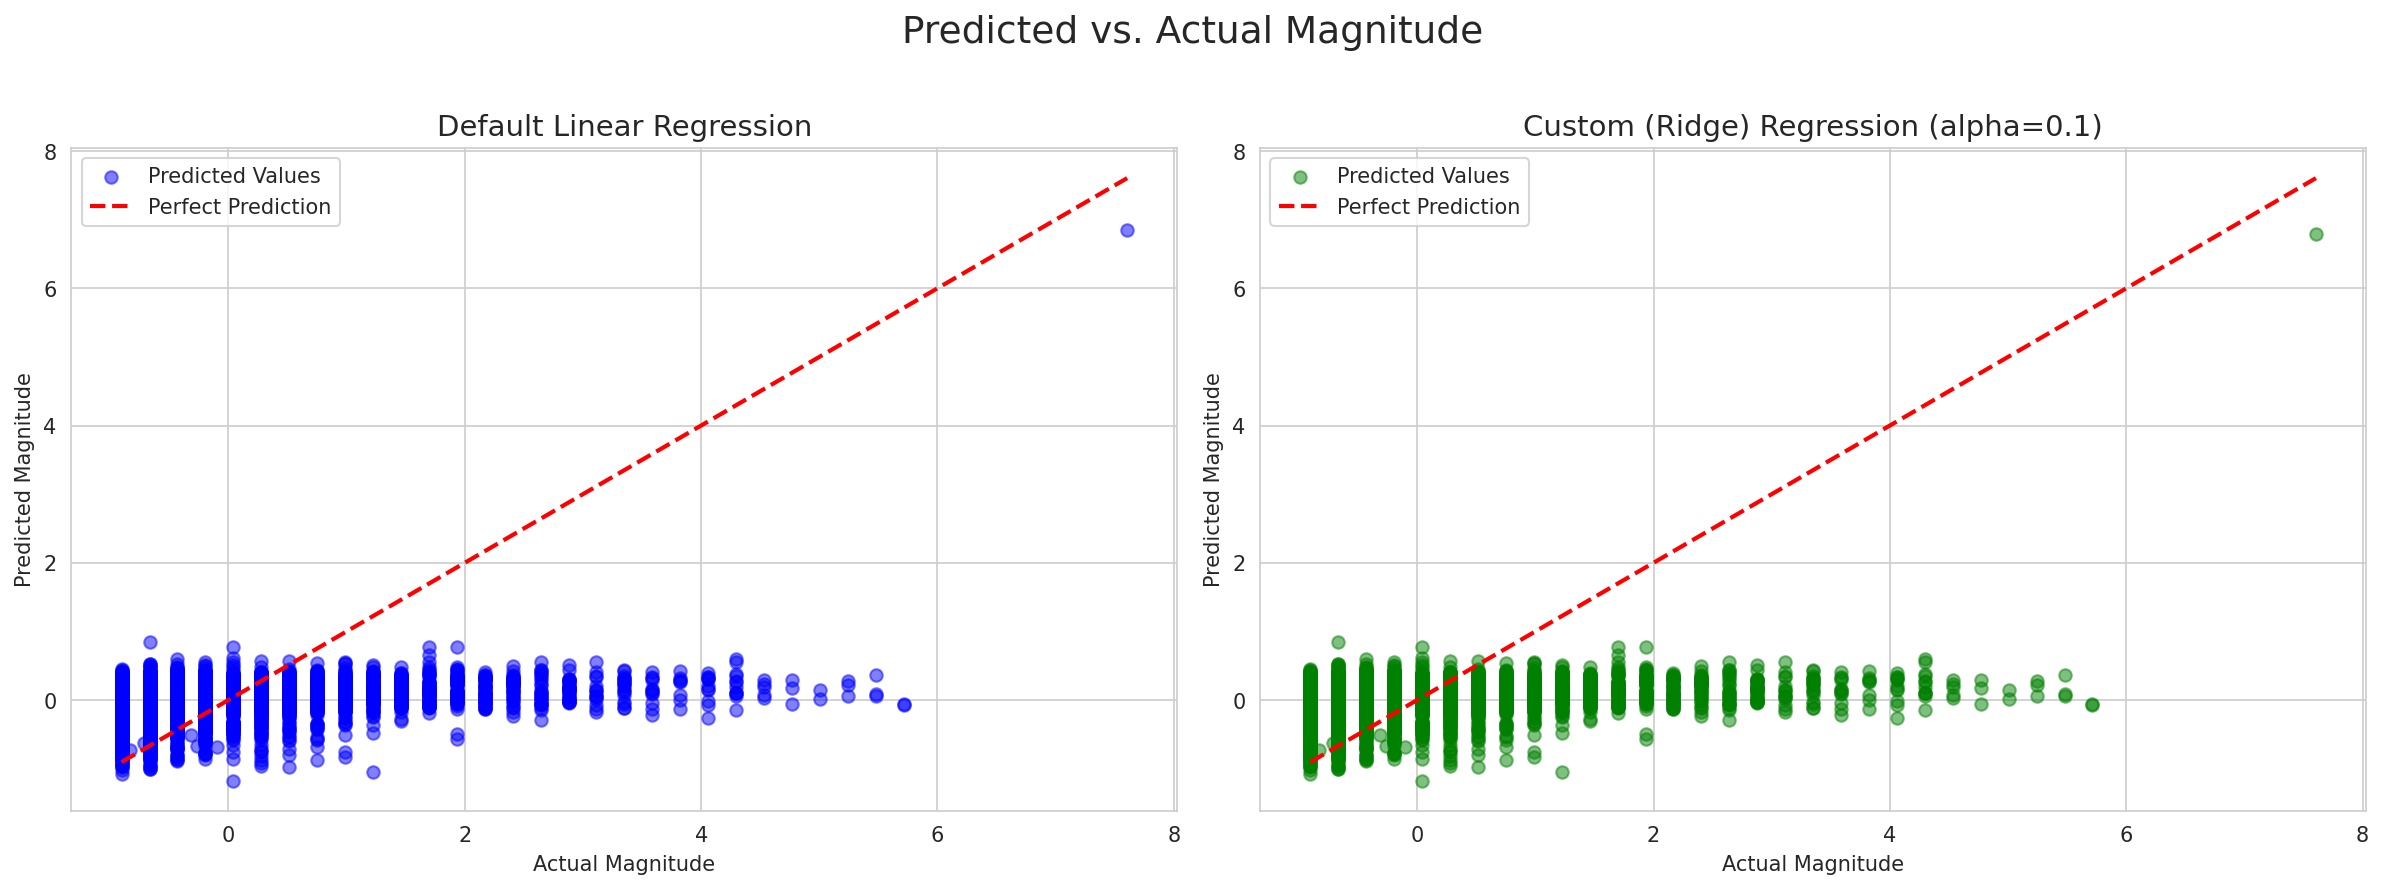

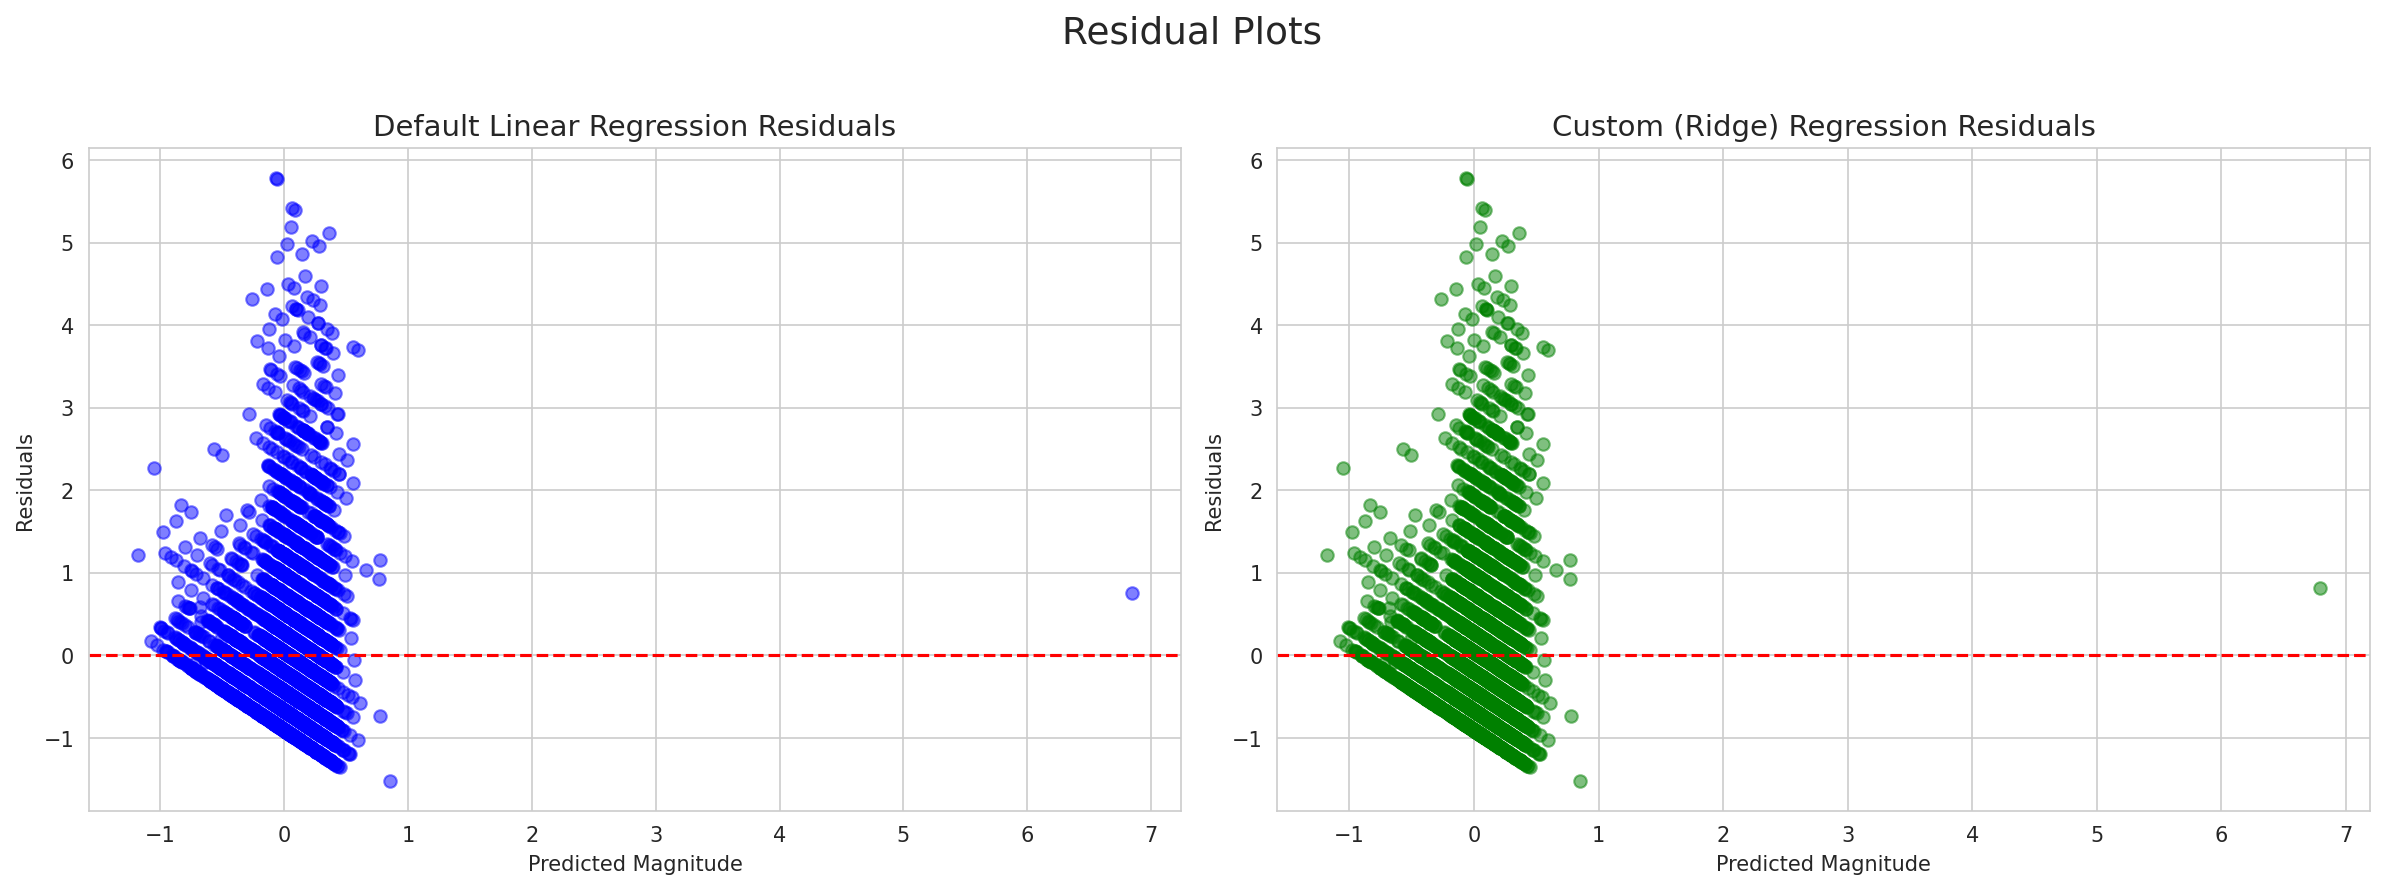

/tmp/ipython-input-926617152.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients_default_sorted.index, data=coefficients_default_sorted, palette='viridis', ax=axes[0])
/tmp/ipython-input-926617152.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients_custom_sorted.index, data=coefficients_custom_sorted, palette='viridis', ax=axes[1])


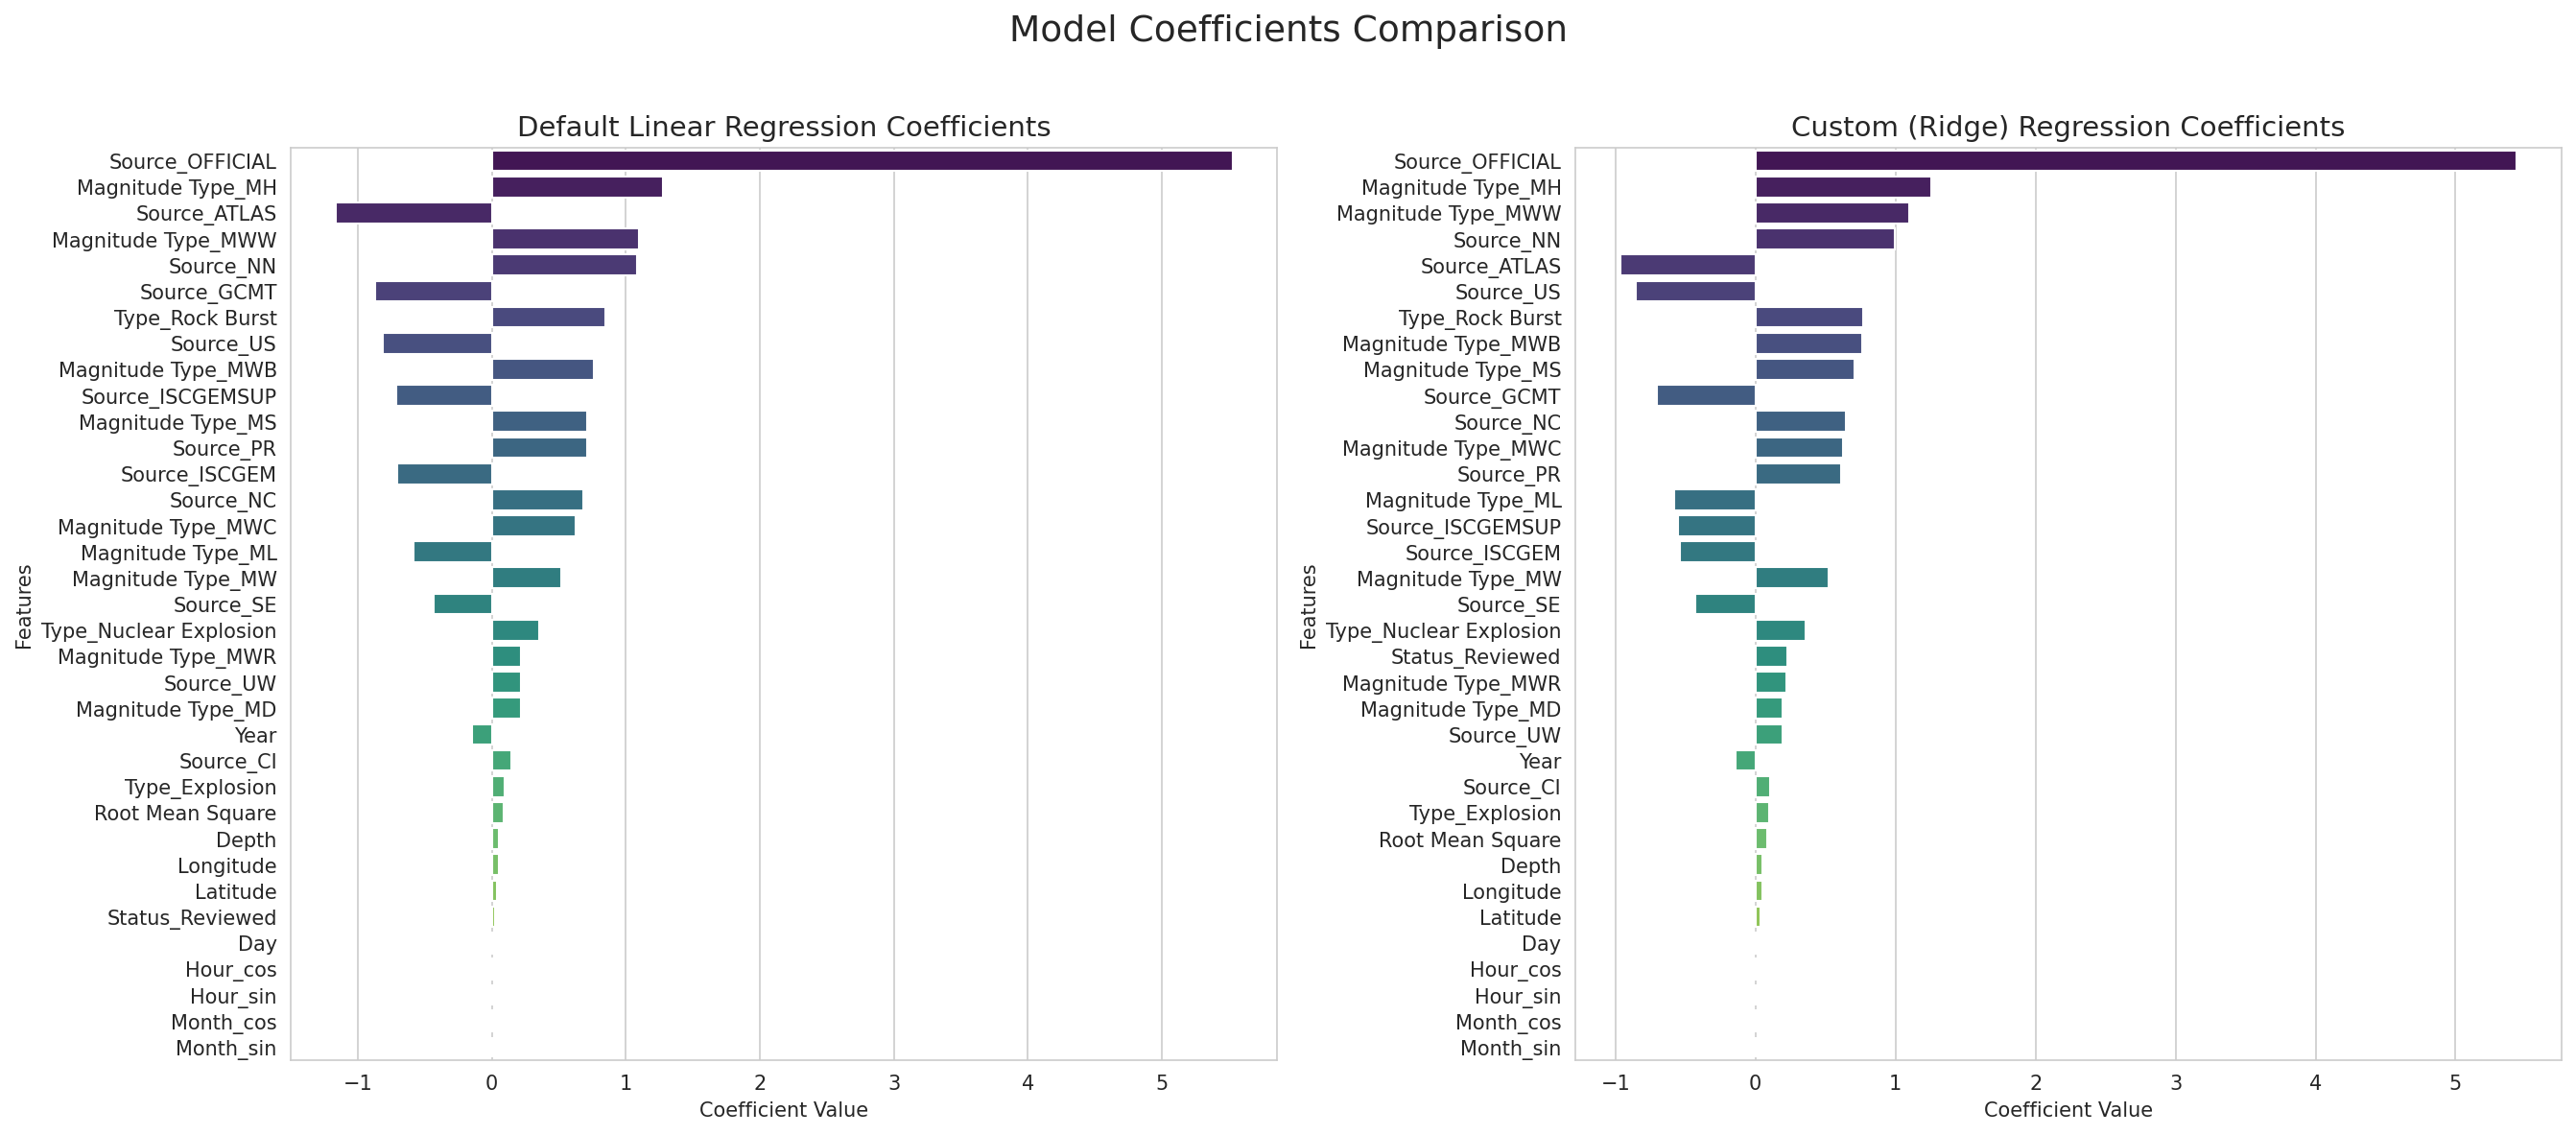

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv('preprocessed_earthquake_data.csv')
X = df.drop(['Magnitude', 'Type', 'Magnitude Type', 'Source', 'Status'], axis=1)
y = df['Magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Default Linear Regression Model...")
default_model = LinearRegression()
default_model.fit(X_train, y_train)
y_pred_default = default_model.predict(X_test)
r2_default = r2_score(y_test, y_pred_default)
mse_default = mean_squared_error(y_test, y_pred_default)
rmse_default = np.sqrt(mse_default)
print("\n--- Default Model Performance ---")
print(f"R-squared (R²): {r2_default:.3f}")
print(f"Mean Squared Error (MSE): {mse_default:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_default:.3f}")
print("\nTraining Custom-Tuned Linear Regression Model (Ridge)...")
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)
best_ridge_model = ridge_grid_search.best_estimator_
best_alpha = ridge_grid_search.best_params_['alpha']
print(f"Optimal alpha for Ridge Regression: {best_alpha}")
y_pred_custom = best_ridge_model.predict(X_test)
r2_custom = r2_score(y_test, y_pred_custom)
mse_custom = mean_squared_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mse_custom)
print("\n--- Custom-Tuned Model Performance ---")
print(f"R-squared (R²): {r2_custom:.3f}")
print(f"Mean Squared Error (MSE): {mse_custom:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom:.3f}")
print("\n" + "="*50)
print("             Summary Report")
print("="*50)
print("Model Comparison for Earthquake Magnitude Prediction")
print("-" * 50)
print(f"{'Model':<30}{'R² Score':<15}{'MSE':<15}{'RMSE':<15}")
print("-" * 50)
print(f"{'Default Linear Regression':<30}{r2_default:<15.3f}{mse_default:<15.3f}{rmse_default:<15.3f}")
print(f"{'Custom (Ridge) Regression':<30}{r2_custom:<15.3f}{mse_custom:<15.3f}{rmse_custom:<15.3f}")
print("="*50)
print("\nCoefficients of the Default Linear Regression Model:")
coefficients_default = pd.DataFrame(default_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients_default)
print("\nCoefficients of the Custom-Tuned (Ridge) Regression Model:")
coefficients_custom = pd.DataFrame(best_ridge_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients_custom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Predicted vs. Actual Magnitude', fontsize=18)
axes[0].scatter(y_test, y_pred_default, alpha=0.5, color='b', label='Predicted Values')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_title('Default Linear Regression', fontsize=14)
axes[0].set_xlabel('Actual Magnitude')
axes[0].set_ylabel('Predicted Magnitude')
axes[0].legend()
axes[1].scatter(y_test, y_pred_custom, alpha=0.5, color='g', label='Predicted Values')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1].set_title(f'Custom (Ridge) Regression (alpha={best_alpha})', fontsize=14)
axes[1].set_xlabel('Actual Magnitude')
axes[1].set_ylabel('Predicted Magnitude')
axes[1].legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Residual Plots', fontsize=18)
residuals_default = y_test - y_pred_default
axes[0].scatter(y_pred_default, residuals_default, alpha=0.5, color='b')
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('Default Linear Regression Residuals', fontsize=14)
axes[0].set_xlabel('Predicted Magnitude')
axes[0].set_ylabel('Residuals')
residuals_custom = y_test - y_pred_custom
axes[1].scatter(y_pred_custom, residuals_custom, alpha=0.5, color='g')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('Custom (Ridge) Regression Residuals', fontsize=14)
axes[1].set_xlabel('Predicted Magnitude')
axes[1].set_ylabel('Residuals')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
coefficients_default = pd.DataFrame(default_model.coef_, X.columns, columns=['Coefficient'])
coefficients_custom = pd.DataFrame(best_ridge_model.coef_, X.columns, columns=['Coefficient'])
coefficients_default_sorted = coefficients_default.reindex(coefficients_default['Coefficient'].abs().sort_values(ascending=False).index)
coefficients_custom_sorted = coefficients_custom.reindex(coefficients_custom['Coefficient'].abs().sort_values(ascending=False).index)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Model Coefficients Comparison', fontsize=18)
sns.barplot(x='Coefficient', y=coefficients_default_sorted.index, data=coefficients_default_sorted, palette='viridis', ax=axes[0])
axes[0].set_title('Default Linear Regression Coefficients', fontsize=14)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Features')
sns.barplot(x='Coefficient', y=coefficients_custom_sorted.index, data=coefficients_custom_sorted, palette='viridis', ax=axes[1])
axes[1].set_title('Custom (Ridge) Regression Coefficients', fontsize=14)
axes[1].set_xlabel('Coefficient Value')
axes[1].set_ylabel('Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()